## Questions
1. The independent variable is whether the words are incrongruent or congruent. The dependent variable is the time it takes to name the ink colors in equally-sized lists.

2. We have two groups to study - the test group, and the control group. We are looking to see if the independent variable causes a difference in the dependent variable. Therefore, I would use a paired-sample dependent t-test. The null hypothesis would be that the difference of means in the groups is 0, and the alternative hypothesis is that the difference of means in the groups is not 0. I say this because I am not sure how changing the color's label would affect response time. I would like to use a 95% confidence level.

3. Null Hypthesis H0: u1-u2 = 0, Alternative Hypothesis Ha: u1-u2 != 0. u1 = mean of congruent colors, u2 = mean of incongruent colors, H0 = null hypothesis, Ha = alternative hypothesis.

4. For the paired-sample t-test, the dependent variable must be continuous, the observations must be independent of one another, the dependent variable should be approximately normally distributed, and the dependent variable should not contain any outliers. The dependent variable "time" is continuous.

In [1]:
##Header
import pandas as pd
import math
import matplotlib.pyplot as plt

##Set inline graphs
%matplotlib inline


In [2]:
##Import lab_data
lab_data = pd.read_csv('stroopdata.csv')

In [3]:
##Learning about the data
lab_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
##This will tell us the mean and the standard deviation of each of the data
lab_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


array([[<AxesSubplot:title={'center':'difference'}>]], dtype=object)

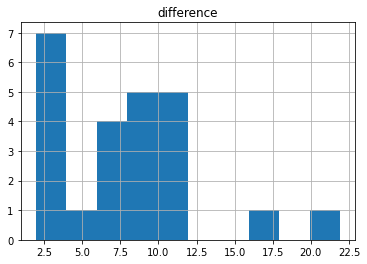

In [5]:
##This cell will look at the historgram of the difference of dependent variables to look for outliers and a normal distribution.
lab_data["difference"] = lab_data["Incongruent"]-lab_data["Congruent"]
lab_data.hist(column='difference')

It looks as if the data is not normally distributed! However, I am going to continue going with the dependent t-test.

## More Questions
3. The mean and standard deviation of both the Congruent and Incongruent color data are listed in the chart above.

4. I have made a boxplot of the data below.

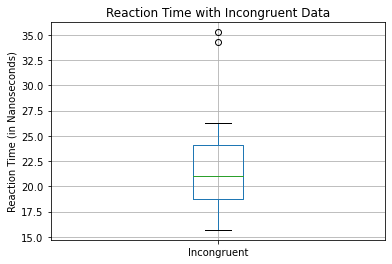

In [7]:
##Here is a boxplot of the incongruent data:
lab_data.boxplot(column='Incongruent')
plt.ylabel("Reaction Time (in Nanoseconds)")
plt.xlabel('')
plt.title("Reaction Time with Incongruent Data");

Text(0, 0.5, 'Reaction Time (in Nanoseconds)')

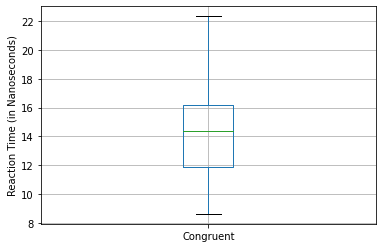

In [9]:
##Here is a boxplot of the congruent data:
lab_data.boxplot(column = 'Congruent')
plt.ylabel("Reaction Time (in Nanoseconds)")

These boxplots show that the mean of the incongruent data is much higher than the mean of the congruent data. Also, regarding the congruent data, there is more of a tail on the upper end of time than in the incongruent data. The incongruent data is more consistent except for a few outliers.

In [10]:
#5. Let us do a t-test involving difference-of-means. 
#First, find the standard error of the mean.

s1 = round(lab_data.Congruent.std(),4)
s2 = round(lab_data.Incongruent.std(),4)
m1 = round(lab_data.Congruent.mean(),4)
m2 = round(lab_data.Incongruent.mean(),4)
md = lab_data.difference.mean()
n = 24
df = n-1
sumd = lab_data.difference.sum()
#sumsqrd = sum of the squared differences

#Let's calculate the sum of the squared differences really quick...

lab_data['sqrdiff'] = lab_data['difference']**2
sumsqrd = round(lab_data.sqrdiff.sum(),2)

#s1 = standard deviation of congruent data, s2 = standard deviation of incongruent data, m1 = mean of congruent data,
#m2 = mean of incongruent data, md = mean difference, n = number of cases, df = degrees of freedom, sumd = sum of the differences


#Find t and tstar (tstar used a t-table with 23 degrees of freedom and 95%)

t = round( (sumd/n) / ( ((sumsqrd)-(sumd**2/n)) / ( (n-1)*n ) )**(1/2) , 2)


tstar = 2.069
#t-star for 23 degrees of freedom with an alpha level of .05, from a table

print('t is: ', t)
print('tstar is:', tstar)




t is:  8.02
tstar is: 2.069


5. The conclusion of the test is that we reject the null hypothesis that the difference is zero. Instead, we accept the alternate hypothesis that there is a statistically significant difference in the means at an alpha of .05. This is what I suspected! This is because the t-value of 8.02 is greater than the two-tailed t-star value of 2.069.

6. I believe that this effect makes sense. It confuses us when we read a word that says one color but displays another. This is called the Stroop Effect. One could also design an experiment with up or down arrows above or below a target. One explanation of the Stroop Effect is the "Speed of Processing Theory." According to this theory, we can process written words faster than we can process colors. Thus, it is difficult to identify the color once we’ve already read the word.